In [1]:
!pip list

Package                Version            
---------------------- -------------------
absl-py                0.9.0              
alembic                1.4.1              
astor                  0.8.1              
async-generator        1.10               
attrs                  19.3.0             
backcall               0.1.0              
beautifulsoup4         4.8.2              
bleach                 3.1.3              
blinker                1.4                
bokeh                  1.4.0              
cachetools             4.1.0              
certifi                2019.11.28         
certipy                0.1.3              
cffi                   1.14.0             
chardet                3.0.4              
click                  7.1.1              
cloudpickle            1.3.0              
conda                  4.8.2              
conda-package-handling 1.6.0              
cryptography           2.8                
cycler                 0.10.0             
Cython     

In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.1.0


In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 2s 0us/step


In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
train_labels.shape

(60000,)

In [7]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [8]:
test_images.shape

(10000, 28, 28)

In [9]:
test_labels.shape

(10000,)

In [10]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

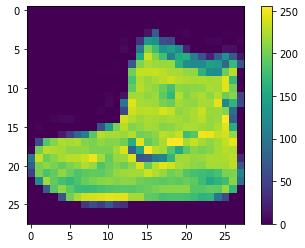

In [18]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [19]:
train_images = train_images / 255.0
test_images = test_images / 255.0

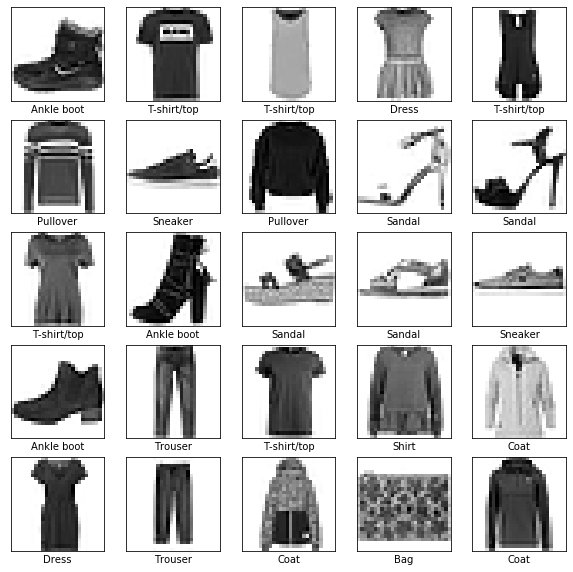

In [22]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [24]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [25]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [26]:
model.fit(train_images, train_labels, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 7s 113us/sample - loss: 0.4968 - accuracy: 0.8247
Epoch 2/5
60000/60000 [==============================] - 5s 78us/sample - loss: 0.3767 - accuracy: 0.8645
Epoch 3/5
60000/60000 [==============================] - 4s 74us/sample - loss: 0.3378 - accuracy: 0.8774
Epoch 4/5
60000/60000 [==============================] - 4s 71us/sample - loss: 0.3140 - accuracy: 0.8859
Epoch 5/5
60000/60000 [==============================] - 4s 69us/sample - loss: 0.2965 - accuracy: 0.8909


In [27]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

10000/10000 - 0s - loss: 0.3466 - accuracy: 0.8765

Test accuracy: 0.8765


In [28]:
predictions = model.predict(test_images)
predictions[0]

array([8.60183960e-08, 4.26384705e-10, 7.11047647e-08, 1.30938611e-08,
       9.76519274e-08, 1.33637795e-02, 1.19437300e-06, 1.85241830e-02,
       3.63812046e-06, 9.68106866e-01], dtype=float32)

In [29]:
np.argmax(predictions[0])

9

In [30]:
test_labels[0]

9

In [31]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                    100*np.max(predictions_array),
                                    class_names[true_label]),
                                    color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1]) 
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')


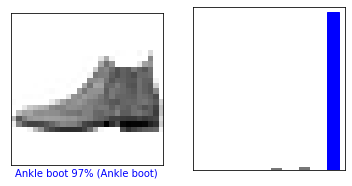

In [32]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

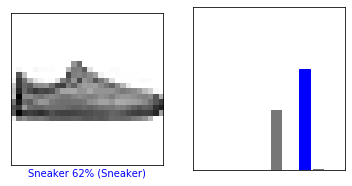

In [33]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

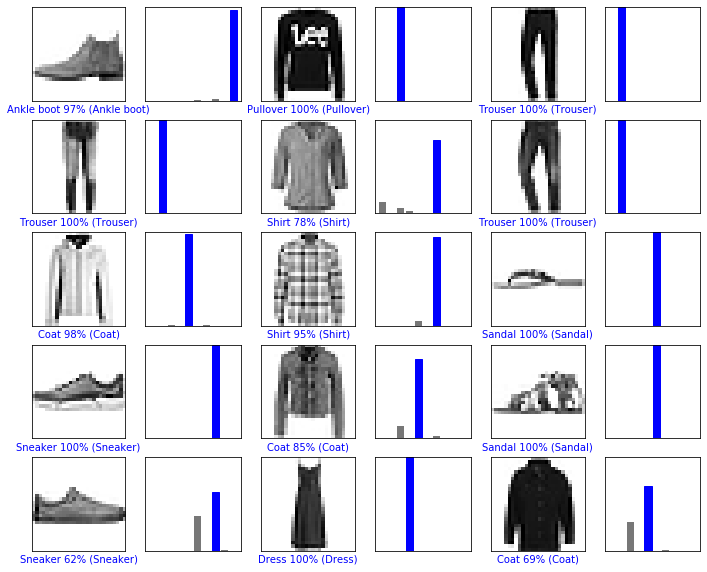

In [34]:
# X個のテスト画像、予測されたラベル、正解ラベルを表示します。
# 正しい予測は青で、間違った予測は赤で表示しています。
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()


In [35]:
# テスト用データセットから画像を1枚取り出す
img = test_images[0]

print(img.shape)

(28, 28)


In [ ]:
# 画像を1枚だけのバッチのメンバーにする
img = (np.expand_dims(img,0))

print(img.shape)
